In [95]:
from functools import partial

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import jax.numpy as np
from jax import grad, jit, vmap

from dipole import VectorValuedKRR
from utils import matern, gaussian

In [94]:
data = np.load('data/HOOH.DFT.PBE-TS.light.MD.500K.50k.R_E_F_D_Q.npz')
X = np.array(data['R'])
y = np.array(data['D'])

In [99]:
import numpy as onp
from sklearn.model_selection import GridSearchCV


def search_hyperparams(size=50, **choices):
    for param, values in choices.items():
        if not isinstance(values, list):
            choices[param] = [values]
        else:
            search_param = param
     
    M = X.shape[0]

    indices = onp.random.choice(M, size=size, replace=False)
    Xtrain, ytrain = X[indices], y[indices]

    cross_validation = GridSearchCV(VectorValuedKRR(), choices)
    cross_validation.fit(Xtrain, ytrain)
    results = cross_validation.cv_results_
    mean_scores = -results['mean_test_score']
    return mean_scores

In [35]:
factors = [1, 3]
vals_big = []
tens = [10**i for i in range(-5, 4)]
for i in range(len(tens)):
    vals_big += [factor * tens[i] for factor in factors]
vals_small = [round(val, 1) for val in np.linspace(-1, 1, 21)]

In [64]:
scores_big, scores_small = [], []

In [82]:
# vals_small = list(vals_small)
vals_big

[1e-05,
 3.0000000000000004e-05,
 0.0001,
 0.00030000000000000003,
 0.001,
 0.003,
 0.01,
 0.03,
 0.1,
 0.30000000000000004,
 1,
 3,
 10,
 30,
 100,
 300,
 1000,
 3000]

In [37]:
_, scores = search_hyperparams(size=10, lamb=vals_small, sigma=500)

In [100]:
scores

array([  1.0907,   0.0874,   0.8332,   5.3644,   0.7205,   0.7597,
         1.5159,   8.3208,   1.703 , 145.419 , 894.7739,  20.6937,
         2.2038,   2.4044,   2.4822,  30.8146,   0.9073,   0.2362,
         1.5716,   0.1802,   0.7995])

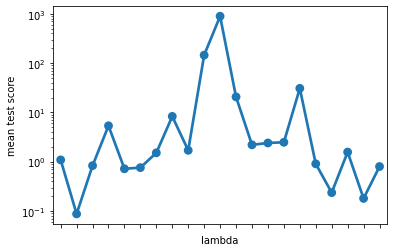

In [63]:
data = pd.DataFrame({'lambda': vals_small, 'mean test score': scores})
plot = sns.pointplot(x='lambda', y='mean test score', data=data)
plt.yscale('log')
plot.set(xticklabels=[])
plt.show()

In [65]:
for _ in range(10):
    print('.', end='')
    scores_big.append(search_hyperparams(size=100, lamb=vals_big, sigma=500))
    scores_small.append(search_hyperparams(size=100, lamb=vals_small, sigma=500))

..........

In [103]:
def plot(values, scores):
    data = pd.DataFrame({'lambda': values, 'mean test score': scores})
    plot = sns.pointplot(x='lambda', y='mean test score', data=data)
    plot.set(xticklabels=[])
    plt.yscale('log')
    plt.show()

In [102]:
def _plot(i):
    data = pd.DataFrame({'lambda': scores_big[i][0], 'mean test score': scores_big[i][1]})
    plot = sns.pointplot(x='lambda', y='mean test score', data=data)
    plot.set(xticklabels=[])
    plt.yscale('log')
    plt.show()

In [92]:
for i in range(10):
    for array in [scores_big, scores_small]:
        print(f'{array[i][0][np.argmin(array[i][1])]:.1f} ', end='')
    print()

30.00 0.60 
30.00 0.80 
3.00 1.00 
30.00 0.70 
30.00 0.60 
30.00 0.70 
30.00 0.70 
30.00 0.10 
30.00 1.00 
30.00 0.80 


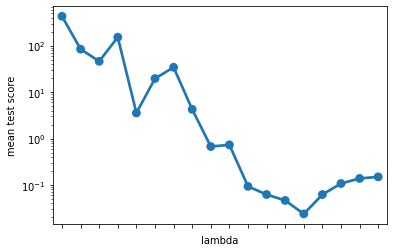

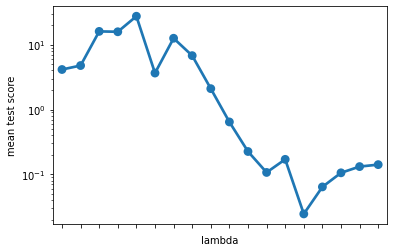

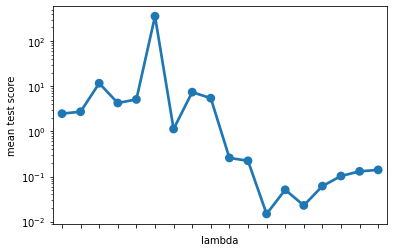

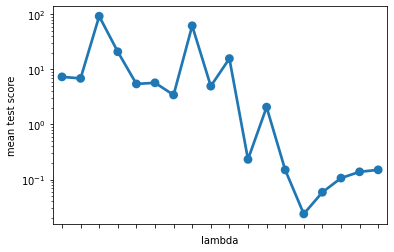

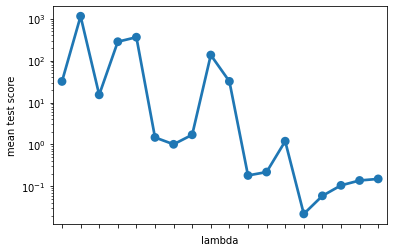

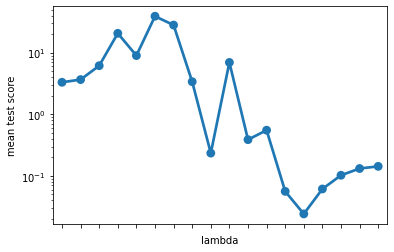

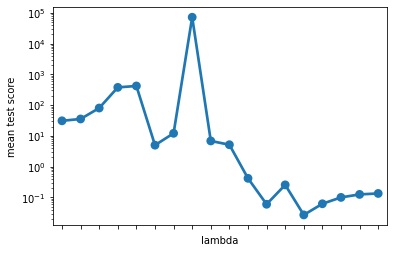

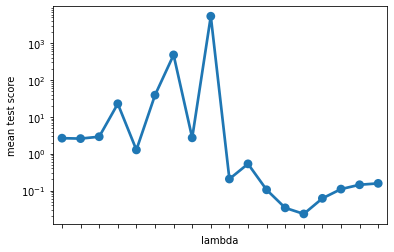

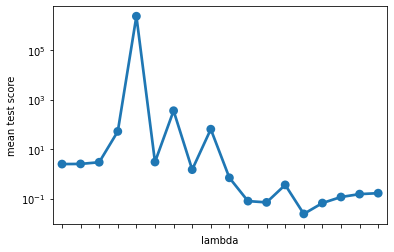

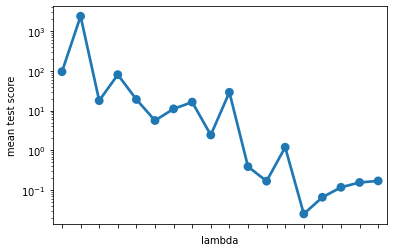

In [96]:
for i in range(10):
    plot(i)

In [98]:
vals_lambda = [0.01, 0.1] + list(range(1, 20))



 sigma = 10


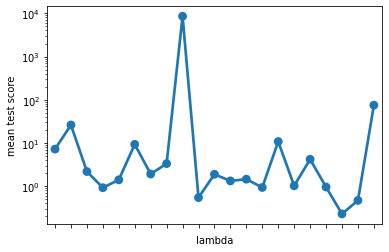

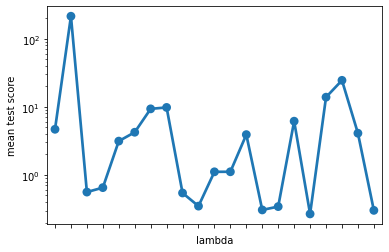

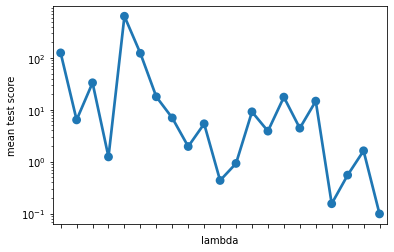



 sigma = 20


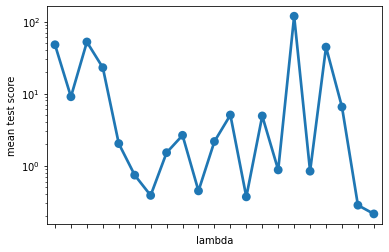

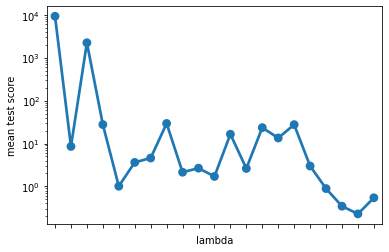

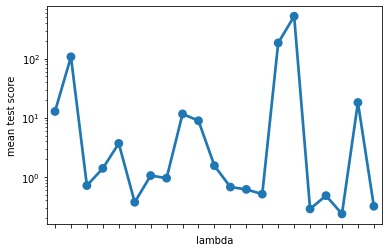



 sigma = 50


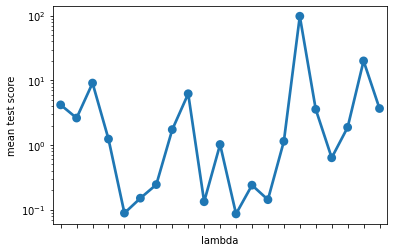

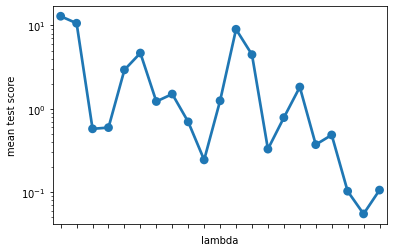

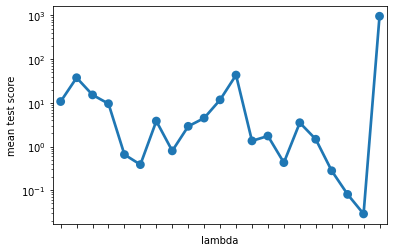



 sigma = 100


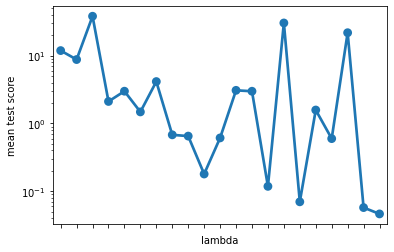

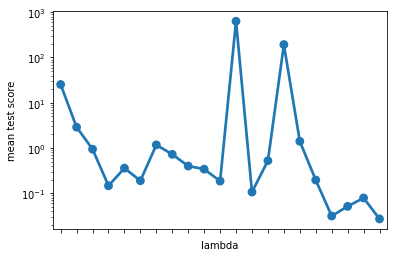

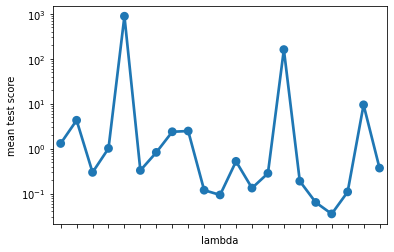



 sigma = 200


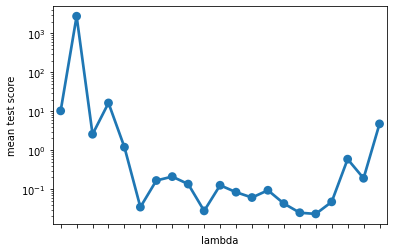

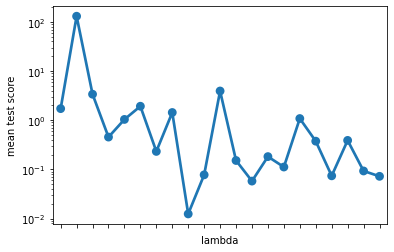

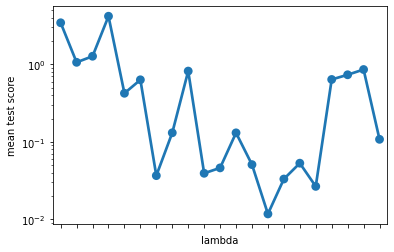



 sigma = 500.0


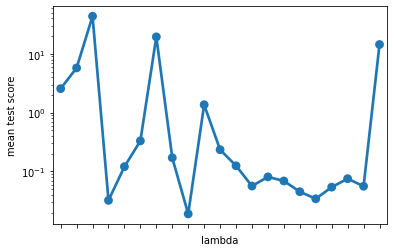

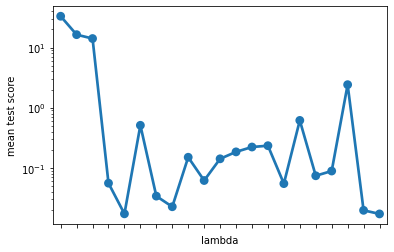

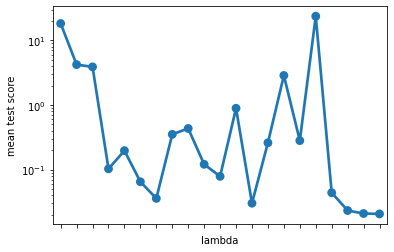



 sigma = 1000.0


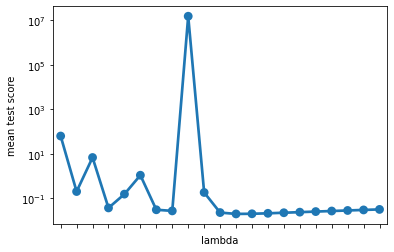

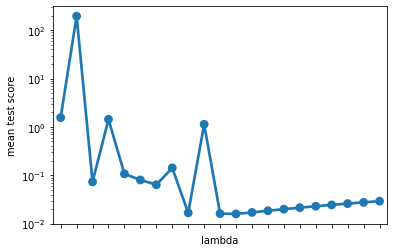

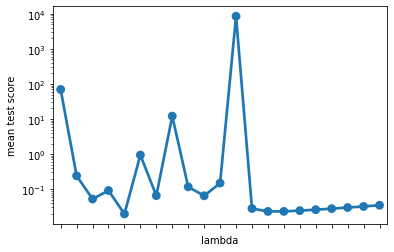



 sigma = 1500.0


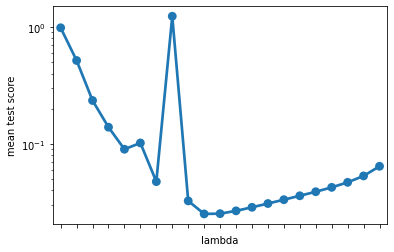

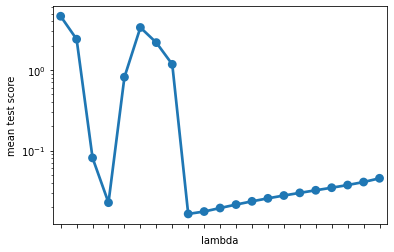

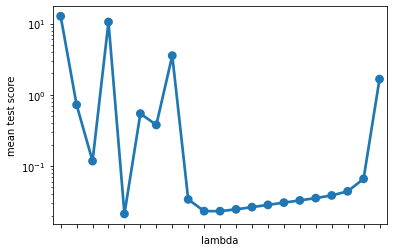



 sigma = 2000.0


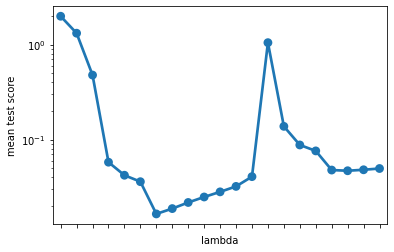

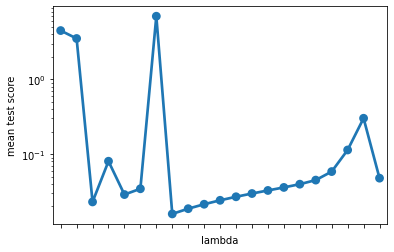

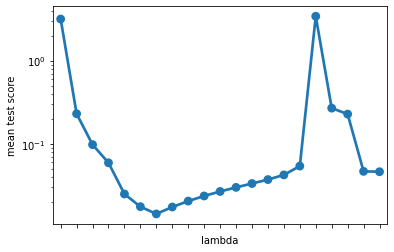



 sigma = 2500.0


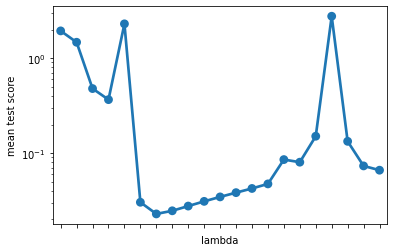

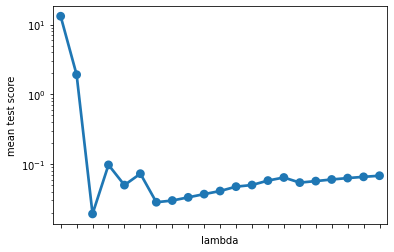

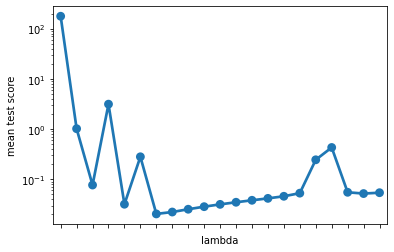

In [106]:
scores = {}
for sigma in [10, 20, 50, 100, 200] + list(np.linspace(500, 2500, 5)):
    print(f"\n\n sigma = {sigma}")
    for i in range(3):
        scores[sigma] = search_hyperparams(size=100, lamb=vals_lambda, sigma=sigma)
        plot(vals_lambda, scores[sigma])

In [109]:
scores[10]

array([125.0151,   6.3863,  33.1619,   1.2348, 636.1136, 122.8478,
        17.8023,   6.9708,   1.9581,   5.3728,   0.4338,   0.9249,
         9.1397,   3.878 ,  17.5572,   4.4169,  14.7053,   0.1545,
         0.5506,   1.6199,   0.0983])



 sigma = 10


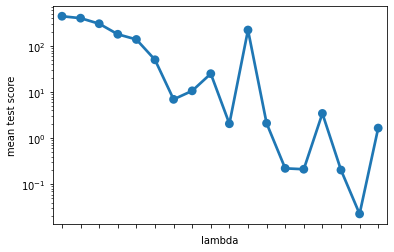

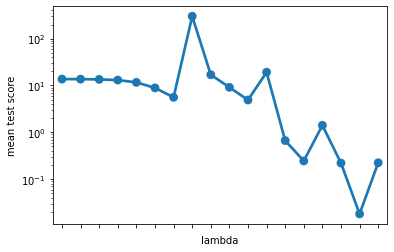

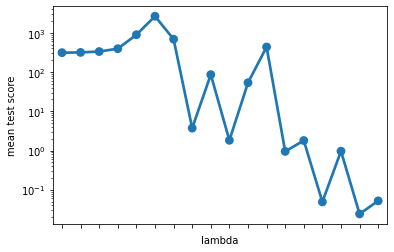



 sigma = 20


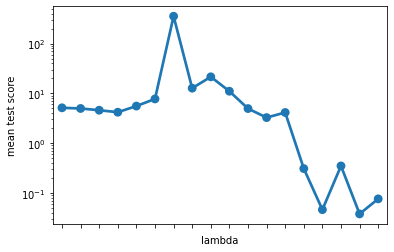

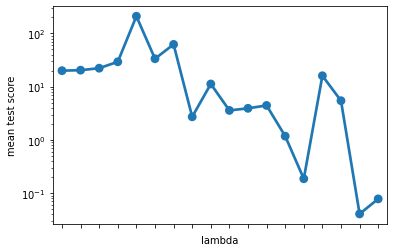

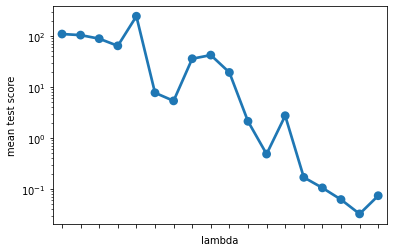



 sigma = 50


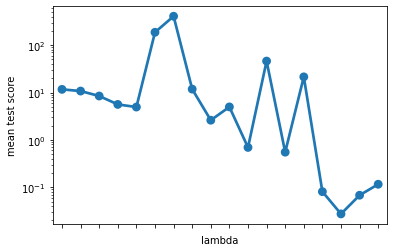

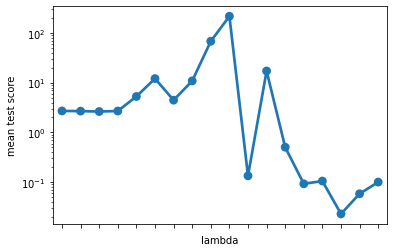

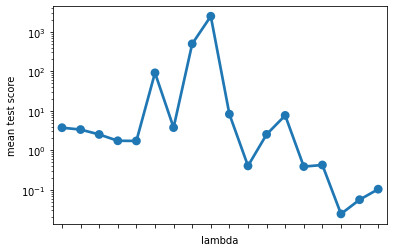



 sigma = 100


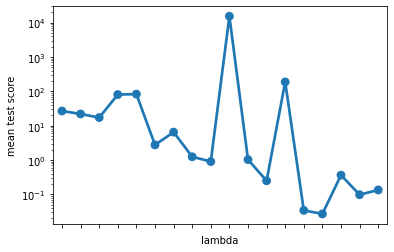

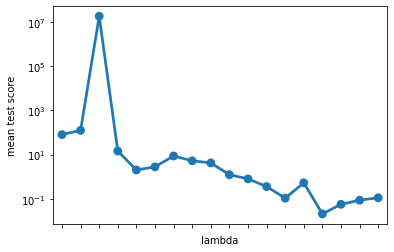

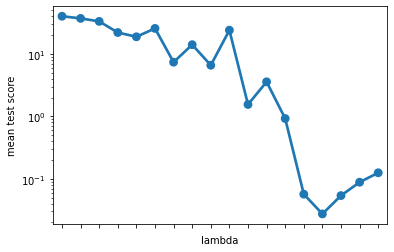



 sigma = 200


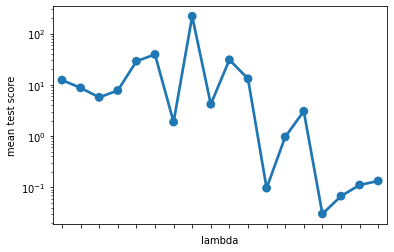

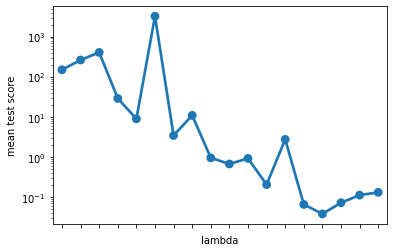

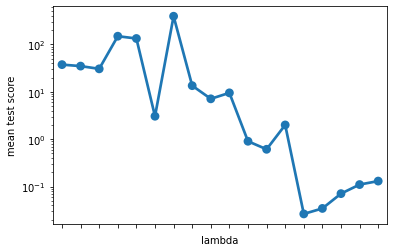



 sigma = 500.0


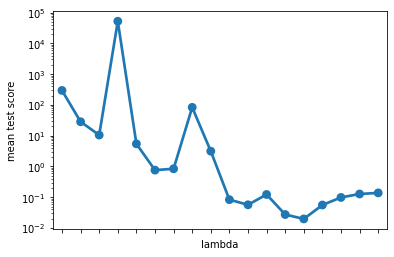

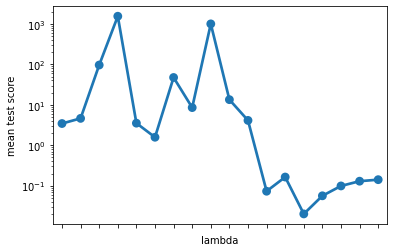

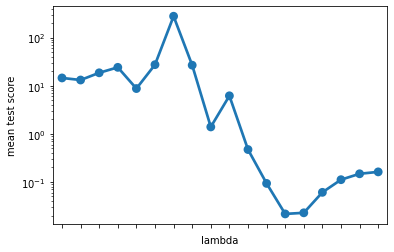



 sigma = 1000.0


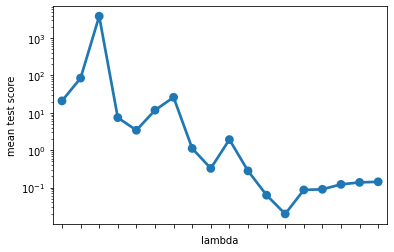

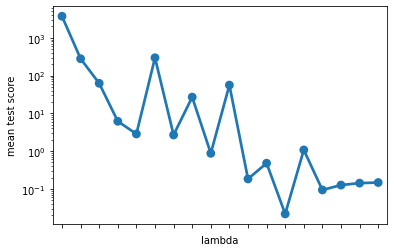

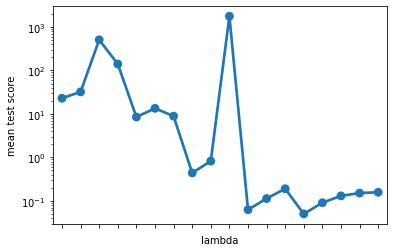



 sigma = 1500.0


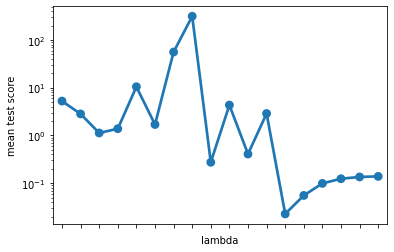

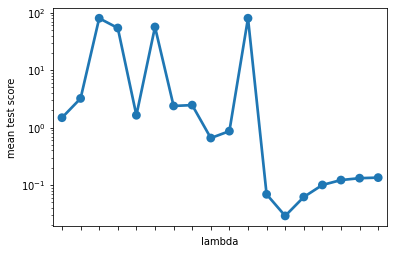

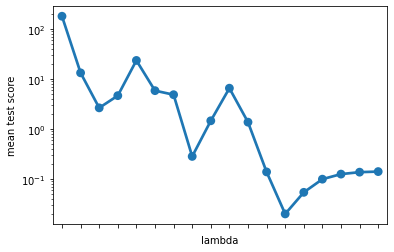



 sigma = 2000.0


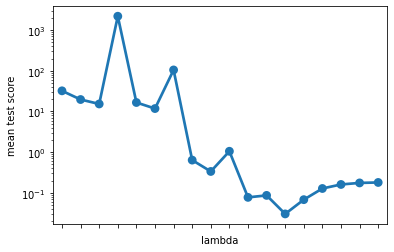

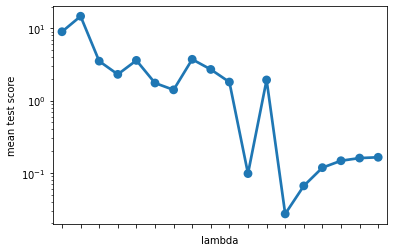

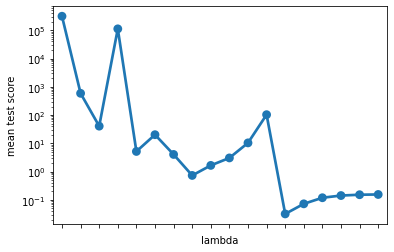



 sigma = 2500.0


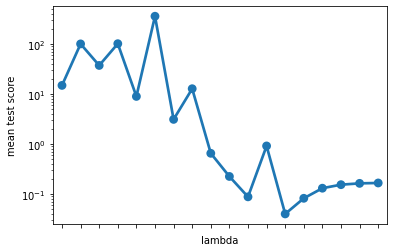

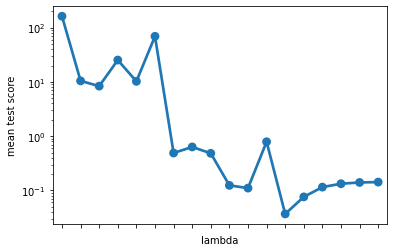

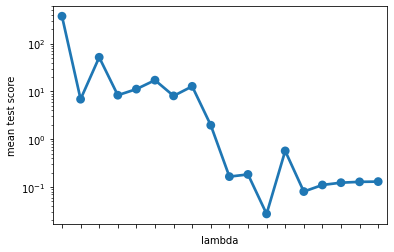

In [112]:
scores_big = {}
for sigma in [10, 20, 50, 100, 200] + list(np.linspace(500, 2500, 5)):
    print(f"\n\n sigma = {sigma}")
    for i in range(3):
        scores_big[sigma] = search_hyperparams(size=100, lamb=vals_big, sigma=sigma)
        plot(vals_big, scores_big[sigma])

In [55]:
scores_lambda

array([    7.4066,     6.3684,   154.3268, 58590.299 ,   216.5804,
           0.4087,     0.4346,     0.0681,     0.0256,     0.1014,
           0.0905])

In [113]:
lambdas = list(np.logspace(0, 3, 10))
lambdas

[1.0,
 2.1544347,
 4.641589,
 10.0,
 21.54435,
 46.415897,
 100.0,
 215.44354,
 464.15897,
 1000.0]

In [135]:
sigmas = list(np.logspace(1, 4, 19))
sigmas

[10.0,
 14.677991,
 21.54435,
 31.622776,
 46.415897,
 68.12921,
 100.0,
 146.77995,
 215.44354,
 316.22775,
 464.15897,
 681.29193,
 1000.0,
 1467.7987,
 2154.4355,
 3162.2776,
 4641.59,
 6812.9194,
 10000.0]

lambda = 1.0


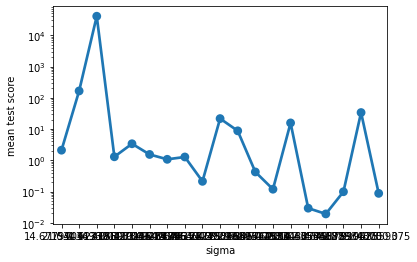

15 0.01919409
lambda = 2.1544346809387207


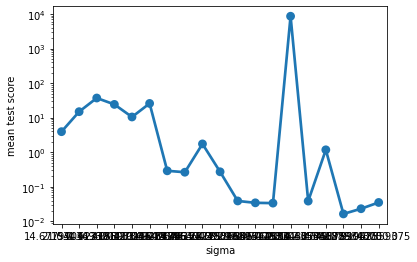

16 0.016451754
lambda = 4.641589164733887


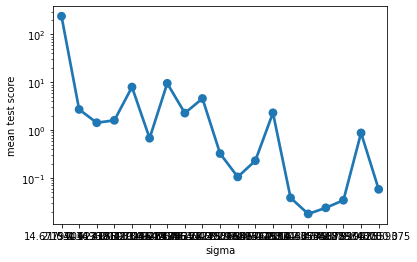

14 0.017831609
lambda = 10.0


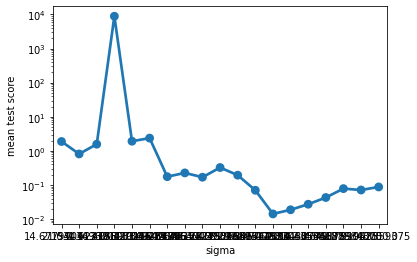

12 0.01415892
lambda = 21.544349670410156


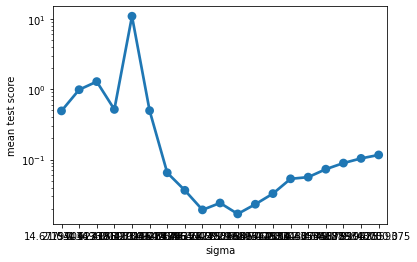

10 0.016853267
lambda = 46.415897369384766


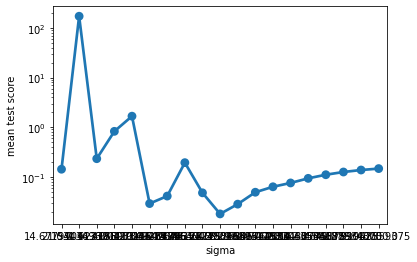

9 0.017919669
lambda = 100.0


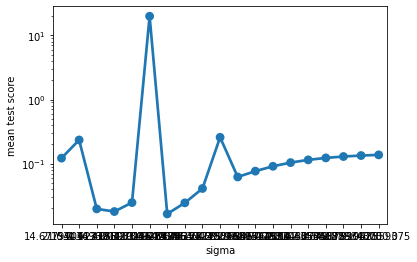

6 0.016458651
lambda = 215.44354248046875


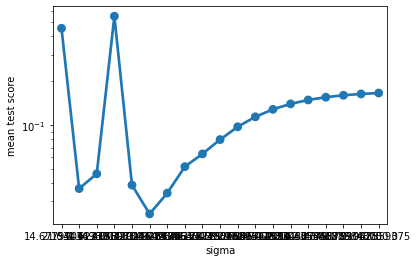

5 0.024685172
lambda = 464.1589660644531


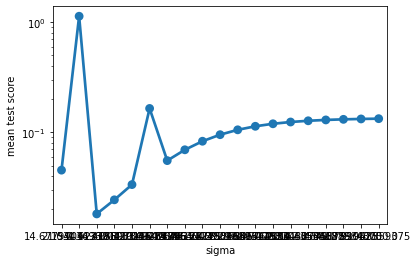

2 0.018212292
lambda = 1000.0


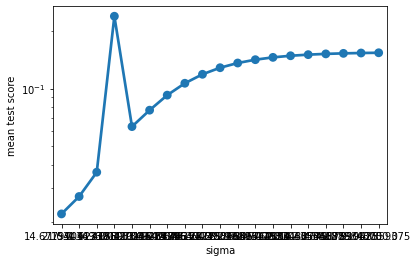

0 0.022079647


In [137]:
scores_sigma = {}
for lamb in lambdas:
    print(f"lambda = {lamb}")
    scores_sigma[lamb] = search_hyperparams(size=100, lamb=lamb, sigma=sigmas)
    data = pd.DataFrame({'sigma': sigmas, 'mean test score': scores_sigma[lamb]})
    sns.pointplot(x='sigma', y='mean test score', data=data)
    plt.yscale('log')
    plt.show()
    print(np.argmin(scores_sigma[lamb]), np.min(scores_sigma[lamb]))

lambda = 1.0


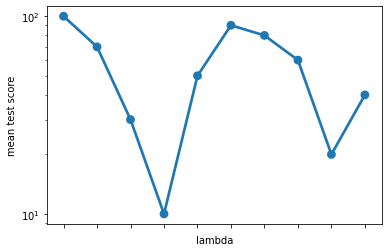

100.0 0.7138195
lambda = 2.1544346809387207


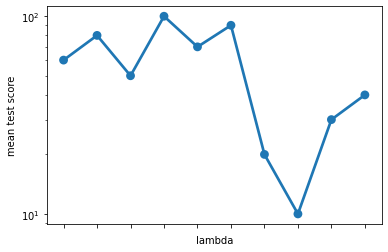

60.0 0.282021
lambda = 4.641589164733887


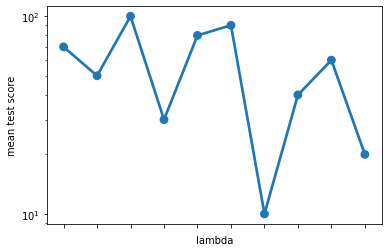

70.00001 0.57614344
lambda = 10.0


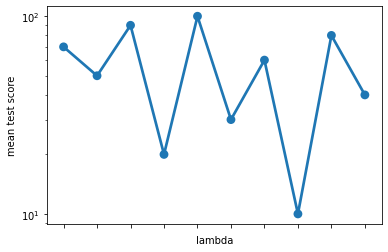

70.00001 0.37054121
lambda = 21.544349670410156


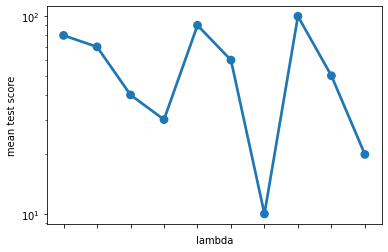

80.0 0.022819413
lambda = 46.415897369384766


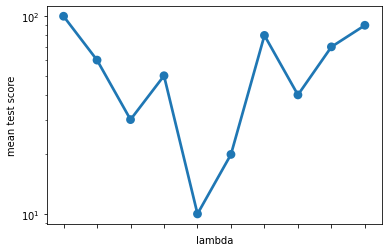

100.0 0.014909845
lambda = 100.0


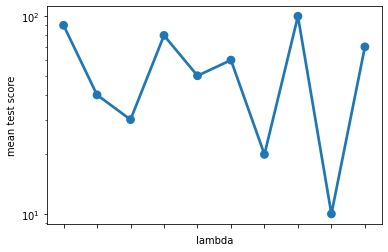

90.00001 0.018822165
lambda = 215.44354248046875


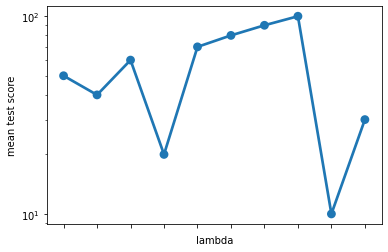

50.000004 0.019463766
lambda = 464.1589660644531


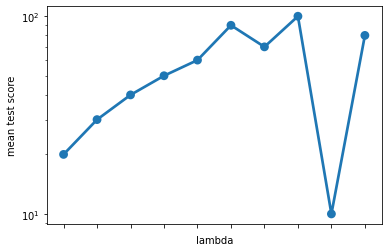

20.0 0.014489246
lambda = 1000.0


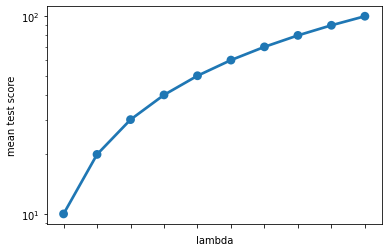

10.0 0.018596897


In [139]:
sigmas2  = list(np.linspace(10, 100, 10))
scores_sigma2 = {}
for lamb in lambdas:
    print(f"lambda = {lamb}")
    scores_sigma2[lamb] = search_hyperparams(size=100, lamb=lamb, sigma=sigmas2)
    plot(scores_sigma2[lamb], sigmas2)
    print(sigmas2[np.argmin(scores_sigma2[lamb])], np.min(scores_sigma2[lamb]))

In [25]:
scores_sigma

array([0.1117, 0.1121, 0.0153, 0.0187, 0.0233, 0.0285, 0.0351, 0.0461,
       0.0768, 0.4438, 0.4244])

In [6]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)

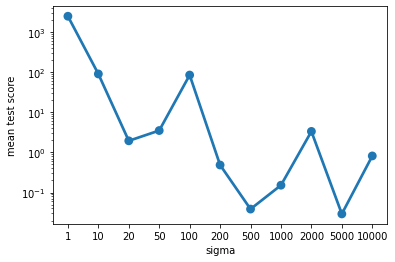

In [22]:
sns.pointplot(x='sigma', y='mean test score', data=data)
plt.yscale('log')

In [17]:
scores_sigma

array([2475.7685,   90.2599,    1.9429,    3.5064,   84.7251,    0.485 ,
          0.0386,    0.152 ,    3.3352,    0.0293,    0.8157])